In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [2]:
from imutils import paths
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
from glob import glob

In [3]:
print(tf. __version__)

2.3.1


In [4]:
print(tf.keras. __version__)

2.4.0


In [5]:
img_rows , img_cols =299,299
train_path = '/home/nimisha/Documents/Rice_2.0/New_model/distribution/Train'

In [6]:
InResV2_model= InceptionResNetV2(weights='imagenet', include_top= False, input_shape=(img_rows,img_cols,3))

In [7]:
def addTopModelInResv2(bottom_model,num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1536,activation='relu')(top_model)
    top_model = Dense(256,activation='relu')(top_model)
    top_model = Dense(192,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,GlobalAveragePooling2D
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model

In [9]:
num_classes=11

In [10]:
FC_Head = addTopModelInResv2(InResV2_model, num_classes)

In [11]:
model=Model(inputs = InResV2_model.input,outputs= FC_Head)
print(model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

Total params: 57,142,507
Trainable params: 57,081,963
Non-trainable params: 60,544
__________________________________________________________________________________________________
None


In [12]:
from keras.preprocessing.image import ImageDataGenerator
train_data_dir='/home/nimisha/Documents/Rice_2.0/New_model/distribution/Train'
validation_data_dir='/home/nimisha/Documents/Rice_2.0/New_model/distribution/Int_val'

In [13]:
image_generator =ImageDataGenerator(rescale=1./255)

In [14]:
batch_size =32
train_generator = image_generator.flow_from_directory(train_data_dir,target_size=(img_rows,img_cols),batch_size=batch_size,
                                                   class_mode='categorical')

Found 73944 images belonging to 11 classes.


In [15]:
validation_generator = image_generator.flow_from_directory(validation_data_dir,target_size=(img_rows,img_cols),
                                                              batch_size=batch_size,
                                                   class_mode='categorical')


Found 18504 images belonging to 11 classes.


In [16]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [17]:
model.compile(loss= 'categorical_crossentropy',optimizer = Adam(learning_rate = 0.00001), metrics = ['accuracy'])

In [18]:
earlystop=EarlyStopping(monitor ='val_loss',min_delta = 0,patience = 8,verbose = 1,restore_best_weights = True)

In [19]:
nb_train_samples = 73944
nb_validation_samples = 18504
epochs = 25
batch_size = 32

In [20]:
fit = model.fit_generator(train_generator,steps_per_epoch = nb_train_samples // batch_size, epochs = epochs,
                              #callbacks = callbacks, 
                          validation_data = validation_generator,
                              validation_steps = nb_validation_samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
2310/2310 [==============================] - 5336s 2s/step - loss: 0.3744 - accuracy: 0.8724 - val_loss: 0.1410 - val_accuracy: 0.9477
Epoch 2/25
2310/2310 [==============================] - 5059s 2s/step - loss: 0.0619 - accuracy: 0.9787 - val_loss: 0.1792 - val_accuracy: 0.9377
Epoch 3/25
2310/2310 [==============================] - 4986s 2s/step - loss: 0.0300 - accuracy: 0.9900 - val_loss: 0.2008 - val_accuracy: 0.9334
Epoch 4/25
2310/2310 [==============================] - 4964s 2s/step - loss: 0.0181 - accuracy: 0.9944 - val_loss: 0.2281 - val_accuracy: 0.9311
Epoch 5/25
2310/2310 [==============================] - 4986s 2s/step - loss: 0.0113 - accuracy: 0.9965 - val_loss: 0.2072 - val_accuracy: 0.9393
Epoch 6/25
2310/2310 [==============================] - 4999s 2s/step - loss: 0.0100 - accuracy: 0.9968 - val_loss: 0.1916 - val_accuracy: 0.9440
Epoch 7/25
2310/2310 [==========================

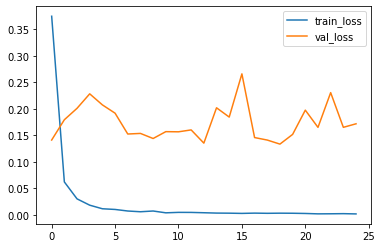

<Figure size 432x288 with 0 Axes>

In [23]:
#loss
plt.plot(fit.history['loss'], label = 'train_loss')
plt.plot(fit.history['val_loss'], label ='val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

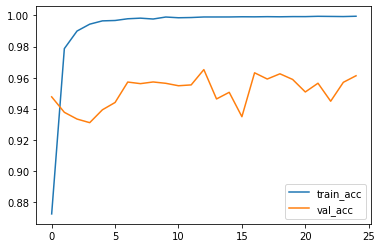

<Figure size 432x288 with 0 Axes>

In [22]:
#accuracy
plt.plot(fit.history['accuracy'], label='train_acc')
plt.plot(fit.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()
plt.savefig('AccuracyVal_acc')

In [27]:
import tensorflow as tf
from keras.models import load_model

In [25]:
model.save('/home/nimisha/Documents/Rice_2.0/New_model/distribution/Rice_InResv2_Aug36_25epochs.h5')

In [28]:
classifier = load_model('/home/nimisha/Documents/Rice_2.0/New_model/distribution/Rice_InResv2_Aug36_25epochs.h5')

In [29]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np

In [30]:
evaluation_data_dir= '/home/nimisha/Documents/Rice_2.0/New_model/distribution/Ext_val'
evaluation_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
evaluation_generator = evaluation_datagen.flow_from_directory(evaluation_data_dir,target_size=(img_rows,img_cols),
                                                              batch_size=batch_size,
                                                              classes=['1121','1509','1637','1718','1728','BAS_370','CSR_30','DHBT_3','PB_1','PB_6','Unknown'],
                                                   class_mode='categorical', shuffle = False)
true_classes = evaluation_generator.classes
class_labels = list(evaluation_generator.class_indices)   

class_labels

Found 23112 images belonging to 11 classes.


['1121',
 '1509',
 '1637',
 '1718',
 '1728',
 'BAS_370',
 'CSR_30',
 'DHBT_3',
 'PB_1',
 'PB_6',
 'Unknown']

In [32]:
target_names = ['1121','1509','1637','1718','1728','BAS_370','CSR_30','DHBT_3','PB_1','PB_6','Unknown']
Y_pred = classifier.predict_generator(evaluation_generator, 23112 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = metrics.confusion_matrix(evaluation_generator.classes, y_pred)
print(cm)
print('Classification Report')
print(metrics.classification_report(evaluation_generator.classes, y_pred))

Instructions for updating:
Please use Model.predict, which supports generators.
Confusion Matrix
[[1710   16    0   59   15    0    0    0    0    0    0]
 [  13 1757    0   27    3    0    0    0    0    0    0]
 [   0    0 1590    0   20    0    3    0  135   52    0]
 [  84   60    0 1648    8    0    0    0    0    0    0]
 [  32   30    0   17 1704    0    6    0   11    0    0]
 [   0    0    0    0    0 1800    0    0    0    0    0]
 [   7    4    0    0    0    0 1747    3   30    9    0]
 [   0    0    0    0    0    0    0 1800    0    0    0]
 [   0    0    0    0    2    0   14    0 1784    0    0]
 [   0    0    4    0    0    0    9    1   13 1773    0]
 [   0    0    0    0    0    0    0    0    2    0 5110]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1800
           1       0.94      0.98      0.96      1800
           2       1.00      0.88      0.94      1800
           3       0.94  

In [39]:
evaluation_data_dir= '/home/nimisha/Documents/Rice_2.0/New_model/distribution/test_val'
evaluation_datagen = ImageDataGenerator(rescale=1./255)
evaluation_generator = evaluation_datagen.flow_from_directory(evaluation_data_dir,target_size=(img_rows,img_cols),
                                                              batch_size=batch_size,
                                                              classes=['1121','1509','1637','1718','1728','BAS_370','CSR_30','DHBT_3','PB_1','PB_6','Unknown'],
                                                   class_mode='categorical', shuffle = False)
true_classes = evaluation_generator.classes
class_labels = list(evaluation_generator.class_indices)   

class_labels

target_names = ['1121','1509','1637','1718','1728','BAS_370','CSR_30','DHBT_3','PB_1','PB_6','Unknown']
Y_pred = classifier.predict_generator(evaluation_generator, 642 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = metrics.confusion_matrix(evaluation_generator.classes, y_pred)
print(cm)
print('Classification Report')
print(metrics.classification_report(evaluation_generator.classes, y_pred))

Found 642 images belonging to 11 classes.
Confusion Matrix
[[ 49   0   0   1   0   0   0   0   0   0   0]
 [  0  50   0   0   0   0   0   0   0   0   0]
 [  0   0  40   0   0   0   0   0   7   3   0]
 [  0   0   0  50   0   0   0   0   0   0   0]
 [  5   0   0   0  45   0   0   0   0   0   0]
 [  0   0   0   0   0  50   0   0   0   0   0]
 [  0   0   0   0   0   0  50   0   0   0   0]
 [  0   0   0   0   0   0   0  50   0   0   0]
 [  0   0   0   0   0   0   0   0  50   0   0]
 [  0   0   0   0   0   0   0   0   0  50   0]
 [  0   0   0   0   0   0   0   0   0   0 142]]
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        50
           1       1.00      1.00      1.00        50
           2       1.00      0.80      0.89        50
           3       0.98      1.00      0.99        50
           4       1.00      0.90      0.95        50
           5       1.00      1.00      1.00        50
           6       1.0

In [35]:
evaluation_data_dir= '/home/nimisha/Documents/Rice_2.0/New_model/distribution/Rot_45_ext_test'
evaluation_datagen = ImageDataGenerator(rescale=1./255)
evaluation_generator = evaluation_datagen.flow_from_directory(evaluation_data_dir,target_size=(img_rows,img_cols),
                                                              batch_size=batch_size,
                                                              classes=['1121','1509','1637','1718','1728','BAS_370','CSR_30','DHBT_3','PB_1','PB_6','Unknown'],
                                                   class_mode='categorical', shuffle = False)
true_classes = evaluation_generator.classes
class_labels = list(evaluation_generator.class_indices)   

class_labels
target_names = ['1121','1509','1637','1718','1728','BAS_370','CSR_30','DHBT_3','PB_1','PB_6','Unknown']
Y_pred = classifier.predict_generator(evaluation_generator, 642 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = metrics.confusion_matrix(evaluation_generator.classes, y_pred)
print(cm)
print('Classification Report')
print(metrics.classification_report(evaluation_generator.classes, y_pred))

Found 642 images belonging to 11 classes.
Confusion Matrix
[[ 48   2   0   0   0   0   0   0   0   0   0]
 [  0  50   0   0   0   0   0   0   0   0   0]
 [  0   0  43   0   1   0   1   0   4   1   0]
 [  3   0   0  47   0   0   0   0   0   0   0]
 [  0   1   0   0  49   0   0   0   0   0   0]
 [  0   0   0   0   0  50   0   0   0   0   0]
 [  0   0   0   0   0   0  50   0   0   0   0]
 [  0   0   0   0   0   0   0  50   0   0   0]
 [  0   0   0   0   0   0   0   0  50   0   0]
 [  0   0   0   0   0   0   0   0   0  50   0]
 [  0   0   0   0   0   0   0   0   0   0 142]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        50
           1       0.94      1.00      0.97        50
           2       1.00      0.86      0.92        50
           3       1.00      0.94      0.97        50
           4       0.98      0.98      0.98        50
           5       1.00      1.00      1.00        50
           6       0.9

In [36]:
evaluation_data_dir= '/home/nimisha/Documents/Rice_2.0/New_model/distribution/Rot_60_ext_test'
evaluation_datagen = ImageDataGenerator(rescale=1./255)
evaluation_generator = evaluation_datagen.flow_from_directory(evaluation_data_dir,target_size=(img_rows,img_cols),
                                                              batch_size=batch_size,
                                                              classes=['1121','1509','1637','1718','1728','BAS_370','CSR_30','DHBT_3','PB_1','PB_6','Unknown'],
                                                   class_mode='categorical', shuffle = False)
true_classes = evaluation_generator.classes
class_labels = list(evaluation_generator.class_indices)   

class_labels
target_names = ['1121','1509','1637','1718','1728','BAS_370','CSR_30','DHBT_3','PB_1','PB_6','Unknown']
Y_pred = classifier.predict_generator(evaluation_generator, 642 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = metrics.confusion_matrix(evaluation_generator.classes, y_pred)
print(cm)
print('Classification Report')
print(metrics.classification_report(evaluation_generator.classes, y_pred))

Found 642 images belonging to 11 classes.
Confusion Matrix
[[ 50   0   0   0   0   0   0   0   0   0   0]
 [  0  50   0   0   0   0   0   0   0   0   0]
 [  0   0  47   0   0   0   0   0   3   0   0]
 [  1   0   0  48   1   0   0   0   0   0   0]
 [  0   1   0   0  49   0   0   0   0   0   0]
 [  0   0   0   0   0  50   0   0   0   0   0]
 [  0   0   0   0   0   0  50   0   0   0   0]
 [  0   0   0   0   0   0   0  50   0   0   0]
 [  0   0   0   0   0   0   0   0  50   0   0]
 [  0   0   0   0   0   0   1   0   0  49   0]
 [  0   0   0   0   0   0   0   0   0   0 142]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       0.98      1.00      0.99        50
           2       1.00      0.94      0.97        50
           3       1.00      0.96      0.98        50
           4       0.98      0.98      0.98        50
           5       1.00      1.00      1.00        50
           6       0.9

In [37]:
evaluation_data_dir= '/home/nimisha/Documents/Rice_2.0/New_model/distribution/Rot_120_ext_test'
evaluation_datagen = ImageDataGenerator(rescale=1./255)
evaluation_generator = evaluation_datagen.flow_from_directory(evaluation_data_dir,target_size=(img_rows,img_cols),
                                                              batch_size=batch_size,
                                                              classes=['1121','1509','1637','1718','1728','BAS_370','CSR_30','DHBT_3','PB_1','PB_6','Unknown'],
                                                   class_mode='categorical', shuffle = False)
true_classes = evaluation_generator.classes
class_labels = list(evaluation_generator.class_indices)   

class_labels
target_names = ['1121','1509','1637','1718','1728','BAS_370','CSR_30','DHBT_3','PB_1','PB_6','Unknown']
Y_pred = classifier.predict_generator(evaluation_generator, 642 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = metrics.confusion_matrix(evaluation_generator.classes, y_pred)
print(cm)
print('Classification Report')
print(metrics.classification_report(evaluation_generator.classes, y_pred))

Found 642 images belonging to 11 classes.
Confusion Matrix
[[ 50   0   0   0   0   0   0   0   0   0   0]
 [  0  50   0   0   0   0   0   0   0   0   0]
 [  0   0  45   0   0   0   1   0   4   0   0]
 [  0   0   0  49   1   0   0   0   0   0   0]
 [  0   0   0   0  49   0   1   0   0   0   0]
 [  0   0   0   0   0  50   0   0   0   0   0]
 [  0   0   0   0   0   0  50   0   0   0   0]
 [  0   0   0   0   0   0   0  50   0   0   0]
 [  0   0   0   0   0   0   0   0  50   0   0]
 [  0   0   0   0   0   0   2   0   0  48   0]
 [  0   0   0   0   0   0   0   0   0   0 142]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      0.90      0.95        50
           3       1.00      0.98      0.99        50
           4       0.98      0.98      0.98        50
           5       1.00      1.00      1.00        50
           6       0.9

In [38]:
evaluation_data_dir= '/home/nimisha/Documents/Rice_2.0/New_model/distribution/Rot_140_ext_test'
evaluation_datagen = ImageDataGenerator(rescale=1./255)
evaluation_generator = evaluation_datagen.flow_from_directory(evaluation_data_dir,target_size=(img_rows,img_cols),
                                                              batch_size=batch_size,
                                                              classes=['1121','1509','1637','1718','1728','BAS_370','CSR_30','DHBT_3','PB_1','PB_6','Unknown'],
                                                   class_mode='categorical', shuffle = False)
true_classes = evaluation_generator.classes
class_labels = list(evaluation_generator.class_indices)   

class_labels
target_names = ['1121','1509','1637','1718','1728','BAS_370','CSR_30','DHBT_3','PB_1','PB_6','Unknown']
Y_pred = classifier.predict_generator(evaluation_generator, 642 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = metrics.confusion_matrix(evaluation_generator.classes, y_pred)
print(cm)
print('Classification Report')
print(metrics.classification_report(evaluation_generator.classes, y_pred))

Found 642 images belonging to 11 classes.
Confusion Matrix
[[ 50   0   0   0   0   0   0   0   0   0   0]
 [  0  50   0   0   0   0   0   0   0   0   0]
 [  0   0  46   0   0   0   1   0   2   1   0]
 [  0   0   0  50   0   0   0   0   0   0   0]
 [  0   1   0   0  47   0   1   0   1   0   0]
 [  0   0   0   0   0  50   0   0   0   0   0]
 [  0   0   0   0   0   0  50   0   0   0   0]
 [  0   0   0   0   0   0   0  50   0   0   0]
 [  0   0   0   0   0   0   0   0  50   0   0]
 [  0   0   0   0   0   0   2   0   0  48   0]
 [  0   0   0   0   0   0   0   0   0   0 142]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      1.00      0.99        50
           2       1.00      0.92      0.96        50
           3       1.00      1.00      1.00        50
           4       1.00      0.94      0.97        50
           5       1.00      1.00      1.00        50
           6       0.9

In [33]:
evaluation_data_dir= '/home/nimisha/Documents/Rice_2.0/New_model/distribution/Rot_160_ext_test'
evaluation_datagen = ImageDataGenerator(rescale=1./255)
evaluation_generator = evaluation_datagen.flow_from_directory(evaluation_data_dir,target_size=(img_rows,img_cols),
                                                              batch_size=batch_size,
                                                              classes=['1121','1509','1637','1718','1728','BAS_370','CSR_30','DHBT_3','PB_1','PB_6','Unknown'],
                                                   class_mode='categorical', shuffle = False)
true_classes = evaluation_generator.classes
class_labels = list(evaluation_generator.class_indices)   

class_labels
target_names = ['1121','1509','1637','1718','1728','BAS_370','CSR_30','DHBT_3','PB_1','PB_6','Unknown']
Y_pred = classifier.predict_generator(evaluation_generator, 642 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = metrics.confusion_matrix(evaluation_generator.classes, y_pred)
print(cm)
print('Classification Report')
print(metrics.classification_report(evaluation_generator.classes, y_pred))

Found 642 images belonging to 11 classes.
Confusion Matrix
[[ 50   0   0   0   0   0   0   0   0   0   0]
 [  0  50   0   0   0   0   0   0   0   0   0]
 [  0   0  45   0   0   0   0   0   5   0   0]
 [  1   1   0  48   0   0   0   0   0   0   0]
 [  0   1   0   0  49   0   0   0   0   0   0]
 [  0   0   0   0   0  50   0   0   0   0   0]
 [  0   0   0   0   0   0  50   0   0   0   0]
 [  0   0   0   0   0   0   0  50   0   0   0]
 [  0   0   0   0   0   0   0   0  50   0   0]
 [  0   0   0   0   0   0   1   0   0  49   0]
 [  0   0   0   0   0   0   0   0   0   0 142]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       0.96      1.00      0.98        50
           2       1.00      0.90      0.95        50
           3       1.00      0.96      0.98        50
           4       1.00      0.98      0.99        50
           5       1.00      1.00      1.00        50
           6       0.9